<a href="https://colab.research.google.com/github/kezinas/ml2025/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#Кластеризация данных

In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

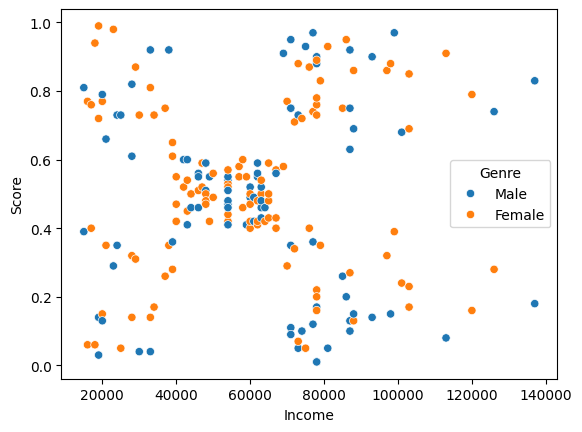

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42).fit(X)
y_kmeans = k_means.labels_
print(k_means)

KMeans(n_clusters=3, random_state=42)


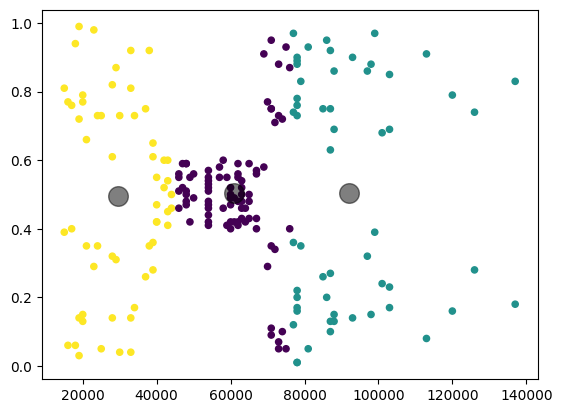

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

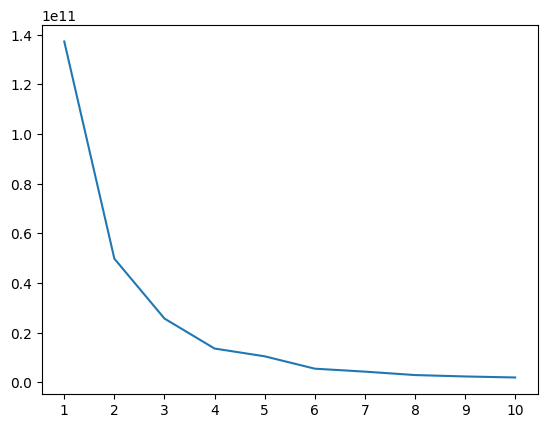

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

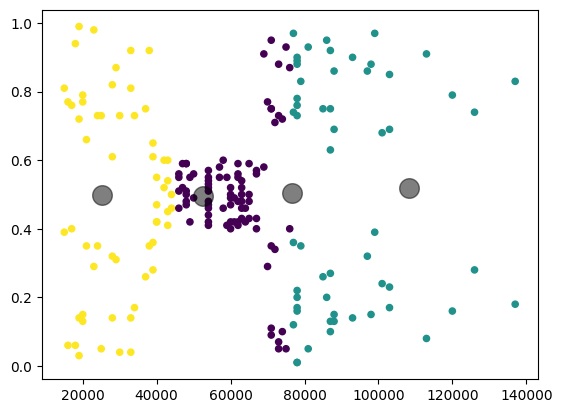

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

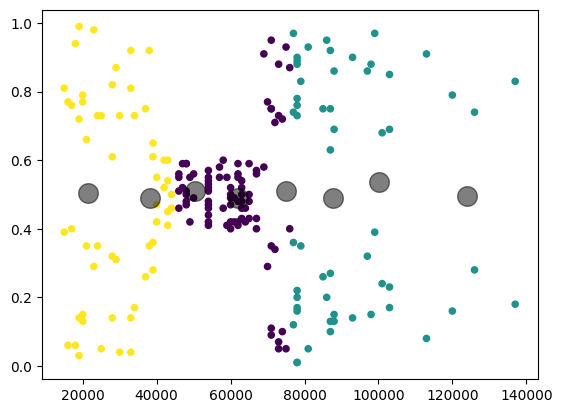

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)

plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


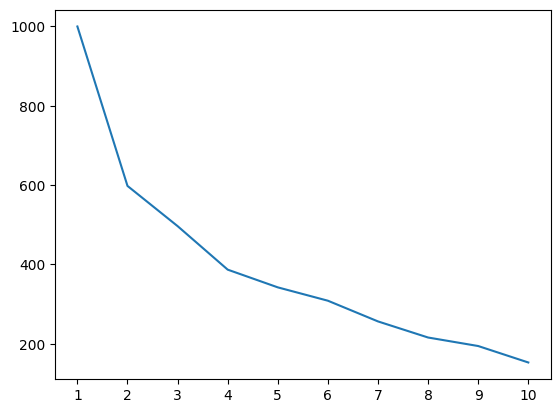

In [ ]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

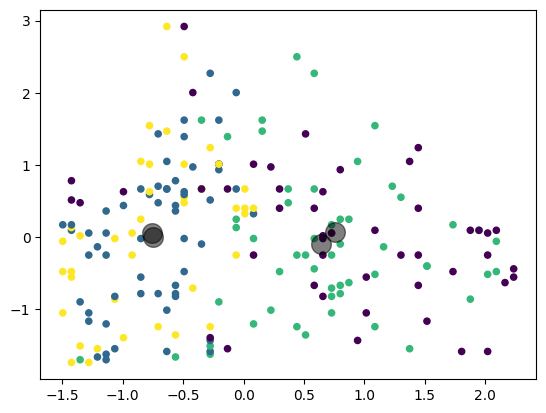

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_

plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [ ]:
df['cluster'] = y_kmeans
for cluster_num in range(5):
    print(cluster_num)
    print(df[df['cluster'] == cluster_num].head()[['Age', 'Genre', 'Income', 'Score']])
    print("\n")
print(df.groupby('cluster')[['Age', 'Income', 'Score']].mean())
print(df.groupby('cluster')['Genre'].value_counts(normalize=True))

0
    Age Genre  Income  Score
8    64  Male   19000   0.03
10   67  Male   19000   0.14
14   37  Male   20000   0.13
18   52  Male   23000   0.29
30   60  Male   30000   0.04


1
    Age   Genre  Income  Score
3    23  Female   16000   0.77
5    22  Female   17000   0.76
7    23  Female   18000   0.94
9    30  Female   19000   0.72
11   35  Female   19000   0.99


2
    Age   Genre  Income  Score
2    20  Female   16000   0.06
4    31  Female   17000   0.40
6    35  Female   18000   0.06
12   58  Female   20000   0.15
16   35  Female   21000   0.35


3
     Age Genre  Income  Score
123   39  Male   69000   0.91
127   40  Male   71000   0.95
129   38  Male   71000   0.75
131   39  Male   71000   0.75
137   32  Male   73000   0.73


4
    Age Genre  Income  Score
0    19  Male   15000   0.39
1    21  Male   15000   0.81
15   22  Male   20000   0.79
17   20  Male   21000   0.66
20   35  Male   24000   0.35


               Age        Income     Score
cluster                              

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


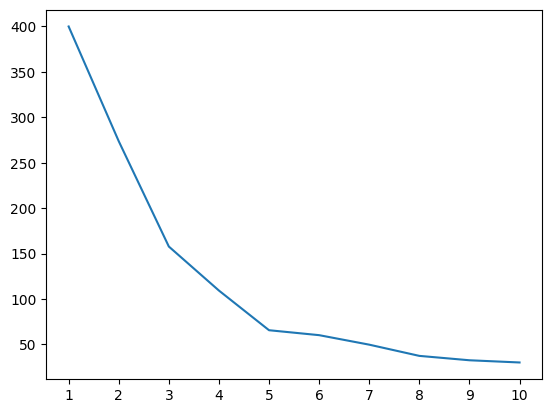

In [ ]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

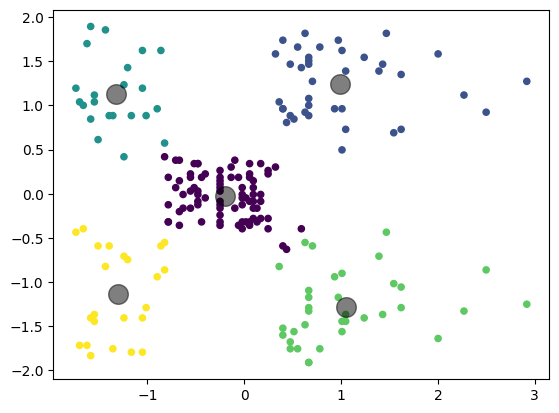

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.labels_

plt.scatter(X_flat.iloc[:, 0], X_flat.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

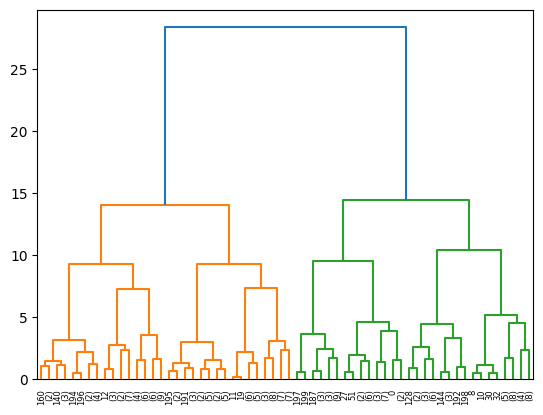

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode="level", p=5)

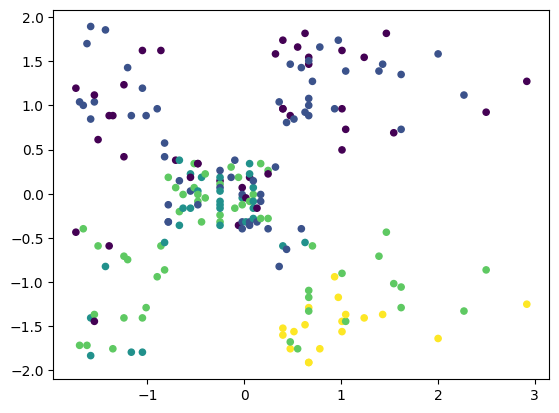

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

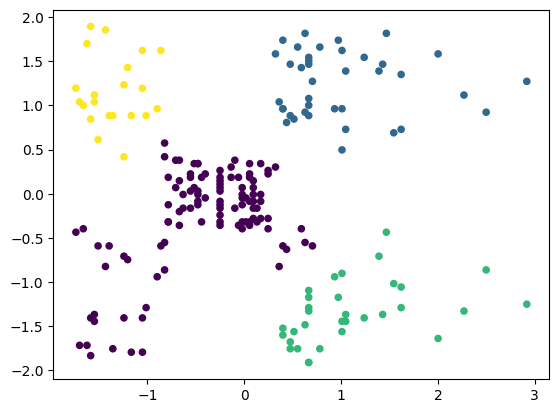

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

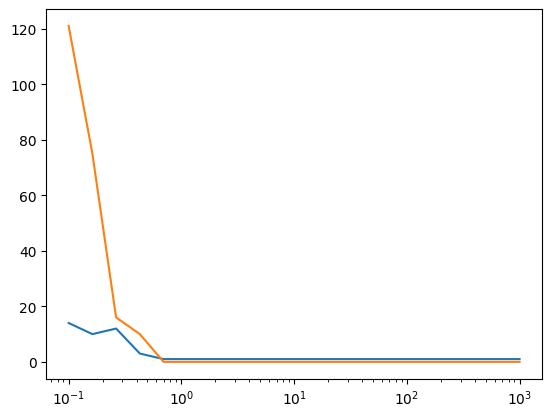

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

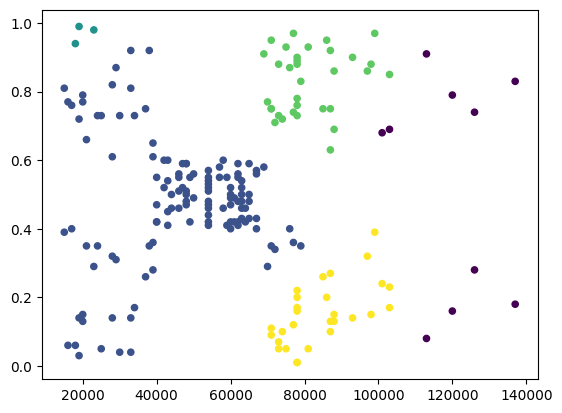

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

##Доп задания

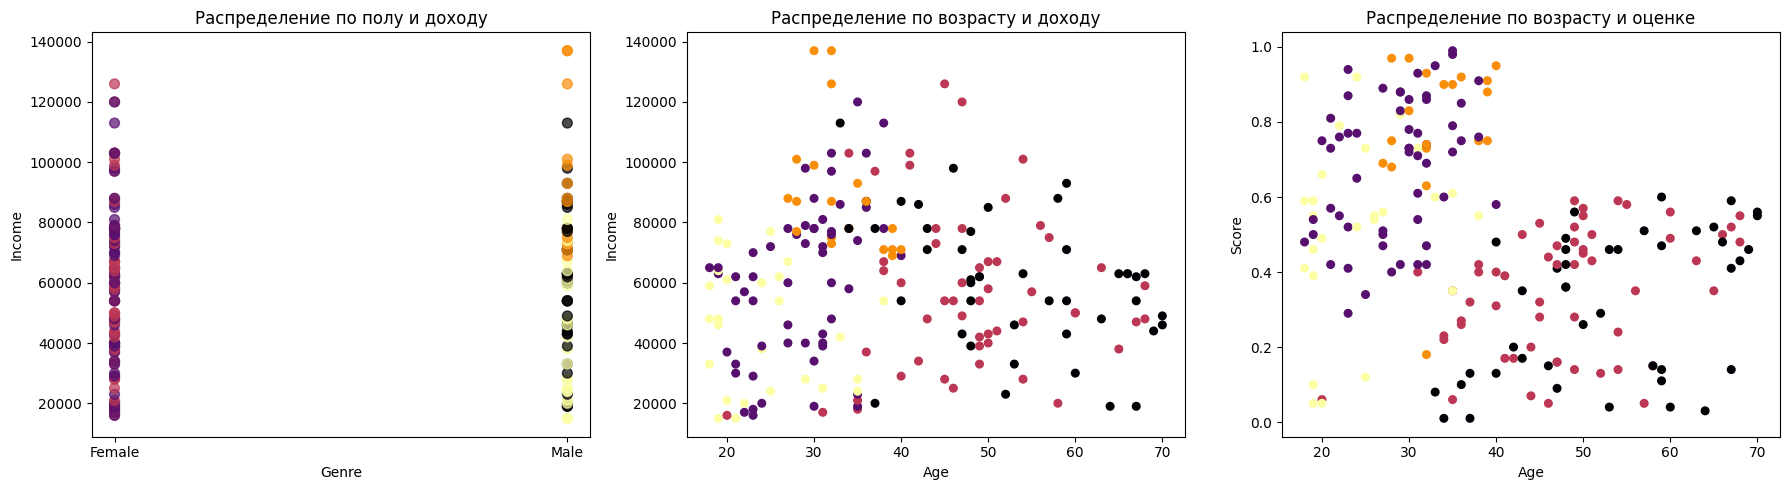

In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv'
df = pd.read_csv(url, index_col=0)
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
k_means = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
df['cluster'] = y_kmeans

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

genre_numeric = pd.get_dummies(df['Genre'], drop_first=True)['Male']
sc1 = axes[0].scatter(genre_numeric, df['Income'], c=df['cluster'], cmap='inferno', s=50, alpha=0.7)
axes[0].set_xticks([0,1], ['Female', 'Male'])
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Income')
axes[0].set_title('Распределение по полу и доходу')

sc2 = axes[1].scatter(df['Age'], df['Income'], c=df['cluster'], cmap='inferno', s=30)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Income')
axes[1].set_title('Распределение по возрасту и доходу')

sc3 = axes[2].scatter(df['Age'], df['Score'], c=df['cluster'], cmap='inferno', s=30)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Score')
axes[2].set_title('Распределение по возрасту и оценке')

plt.tight_layout()
plt.show()

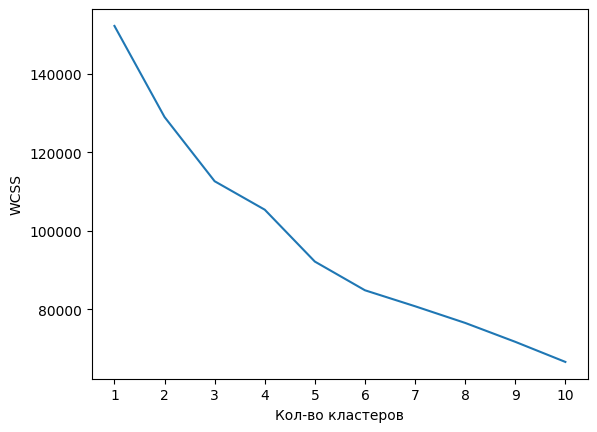

In [ ]:
from sklearn.impute import SimpleImputer
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/credit_card_clustering.csv'
df = pd.read_csv(url, index_col=0)
if 'CustomerID' in df.columns:
    x = df.drop(['CustomerID'], axis=1)
else:
    x = df.copy()
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(x)
X_imputed_df = pd.DataFrame(X_imputed, columns=x.columns)
X = pd.get_dummies(X_imputed_df)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')
plt.show()

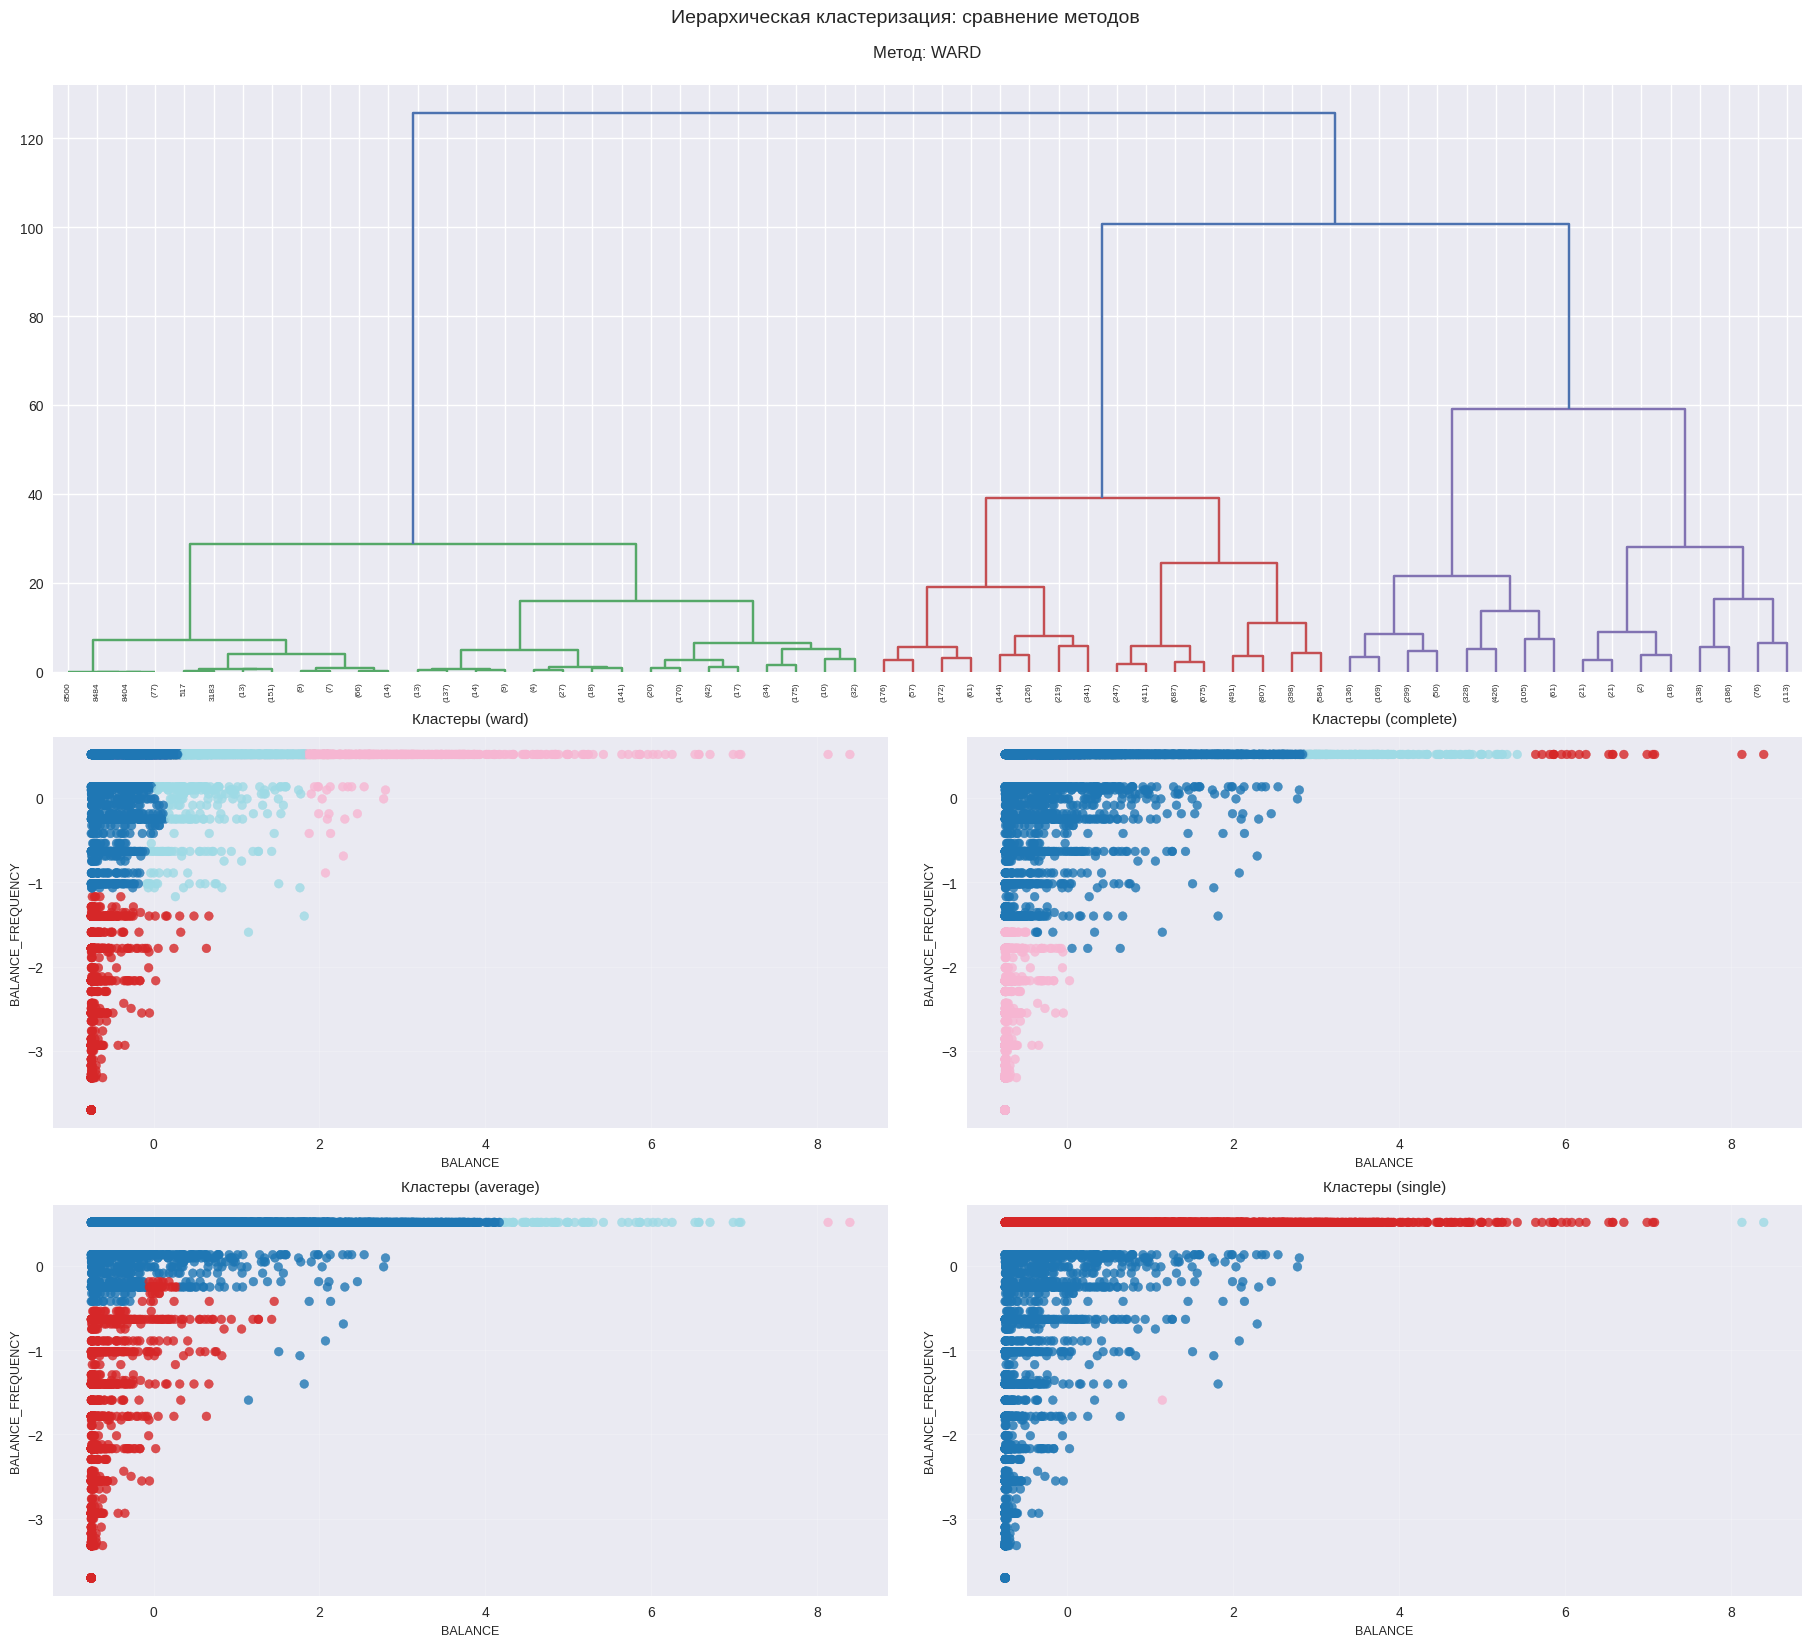

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/credit_card_clustering.csv'
df = pd.read_csv(url, index_col=0).drop('CustomerID', axis=1, errors='ignore')

X = pd.get_dummies(df)
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_flat = X_scaled.iloc[:, :2]

plt.style.use('seaborn-v0_8')
colors = plt.cm.tab20.colors

def custom_dendrogram(model, ax, method_name):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = sum(1 if child < n_samples else counts[child - n_samples]
                          for child in merge)
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, ax=ax, orientation='top',
               leaf_rotation=90, truncate_mode='level', p=5)
    ax.set_title(f'Метод: {method_name.upper()}', pad=20, fontsize=12)

fig = plt.figure(figsize=(18, 16), constrained_layout=True)
grid = fig.add_gridspec(3, 2, height_ratios=[1.5, 1, 1])

methods = ['ward', 'complete', 'average', 'single']
n_clusters = 4

ax_dend = fig.add_subplot(grid[0, :])
if methods[0] == 'ward':
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=methods[0])
    model.fit(X_flat)
    custom_dendrogram(model, ax_dend, methods[0])
else:
    linked = linkage(X_flat, method=methods[0])
    dendrogram(linked, ax=ax_dend)

for i, method in enumerate(methods):
    row = (i // 2) + 1
    col = i % 2

    ax_cluster = fig.add_subplot(grid[row, col])
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method).fit(X_flat)

    scatter = ax_cluster.scatter(X_flat.iloc[:, 0], X_flat.iloc[:, 1],
                               c=clustering.labels_, cmap='tab20', s=40, alpha=0.8)

    ax_cluster.set_title(f'Кластеры ({method})', pad=10, fontsize=11)
    ax_cluster.set_xlabel(X_flat.columns[0], fontsize=9)
    ax_cluster.set_ylabel(X_flat.columns[1], fontsize=9)
    ax_cluster.grid(alpha=0.2)

plt.suptitle('Иерархическая кластеризация: сравнение методов', y=1.02, fontsize=14)
plt.show()

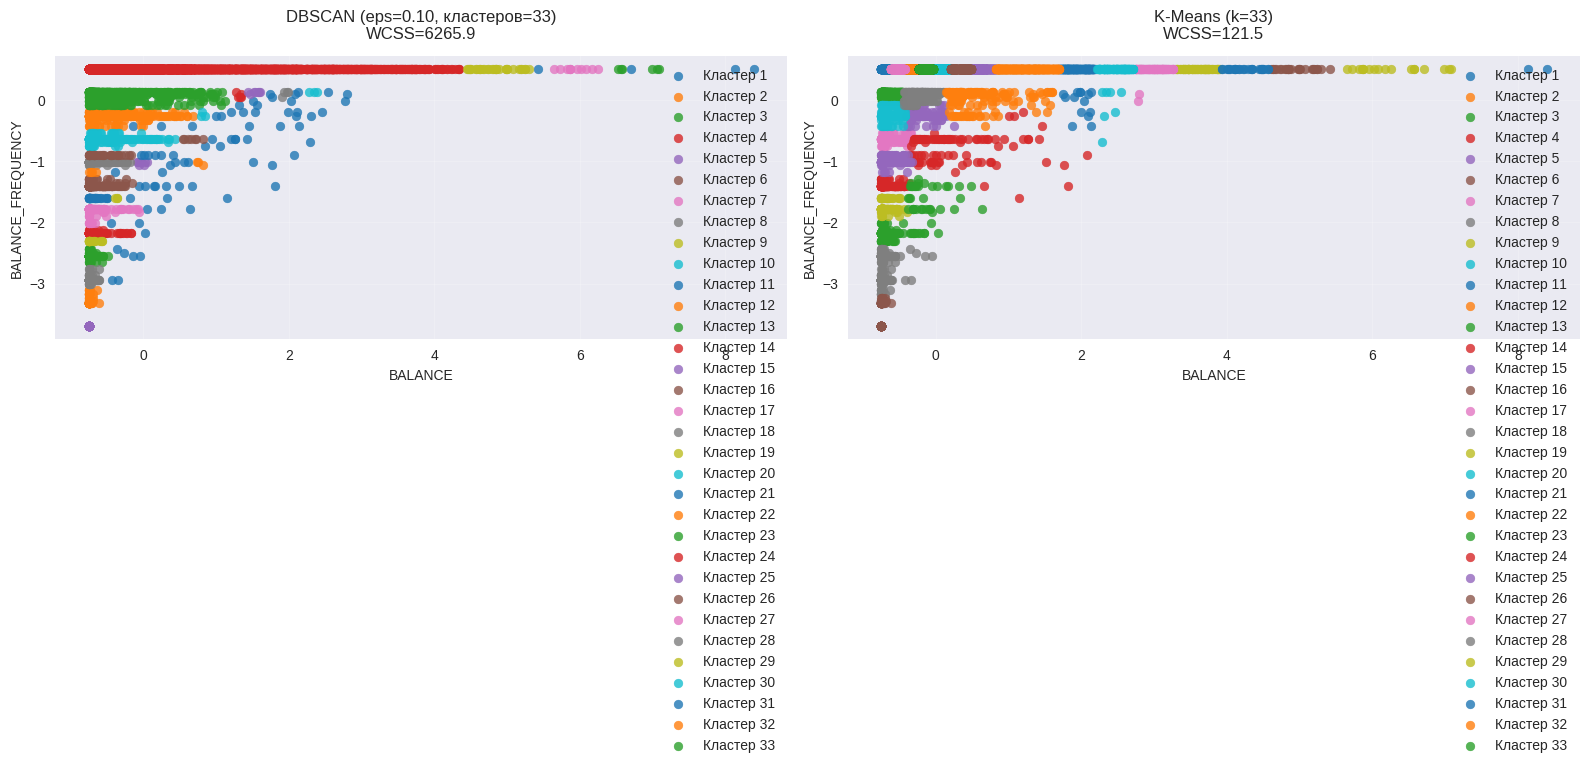

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/credit_card_clustering.csv'
df = pd.read_csv(url, index_col=0).drop('CustomerID', axis=1, errors='ignore')
X = pd.get_dummies(df)
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_flat = X_scaled.iloc[:, :2]

def calculate_wcss(X, labels):
    unique_labels = set(labels)
    wcss = sum(((X[labels == label] - X[labels == label].mean(axis=0))**2).sum()
               for label in unique_labels)
    return wcss

def plot_clusters(X, labels, title, ax, cmap='tab10'):
    unique_labels = sorted(set(labels))
    colors = [plt.cm.tab10(i % 10) for i in range(len(unique_labels))]

    for i, label in enumerate(unique_labels):
        color, marker, alpha = colors[i], 'o', 0.8
        mask = labels == label
        ax.scatter(X.iloc[mask, 0], X.iloc[mask, 1],
                   c=[color], marker=marker, s=40, alpha=alpha, label=f'Кластер {i+1}')

    ax.set_title(title, pad=12, fontsize=12)
    ax.set_xlabel(X.columns[0], fontsize=10)
    ax.set_ylabel(X.columns[1], fontsize=10)
    ax.grid(alpha=0.2)
    ax.legend()

eps_values = np.linspace(0.1, 1.0, 15)
results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(X_flat)
    labels = db.labels_
    n_clusters = len(set(labels))
    wcss = calculate_wcss(X_flat.values, labels)
    results.append((eps, n_clusters, wcss))

best_eps = max(results, key=lambda x: x[1])[0]

dbscan = DBSCAN(eps=best_eps, min_samples=3).fit(X_flat)
db_labels = dbscan.labels_
n_clusters = len(set(db_labels))
db_wcss = calculate_wcss(X_flat.values, db_labels)

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_flat)
km_labels = kmeans.predict(X_flat)
km_wcss = kmeans.inertia_

plt.figure(figsize=(16, 6), facecolor='white')

ax1 = plt.subplot(1, 2, 1)
plot_clusters(X_flat, db_labels,
             f'DBSCAN (eps={best_eps:.2f}, кластеров={n_clusters})\nWCSS={db_wcss:.1f}', ax1)

ax2 = plt.subplot(1, 2, 2)
plot_clusters(X_flat, km_labels,
             f'K-Means (k={n_clusters})\nWCSS={km_wcss:.1f}', ax2)

plt.tight_layout()
plt.show()

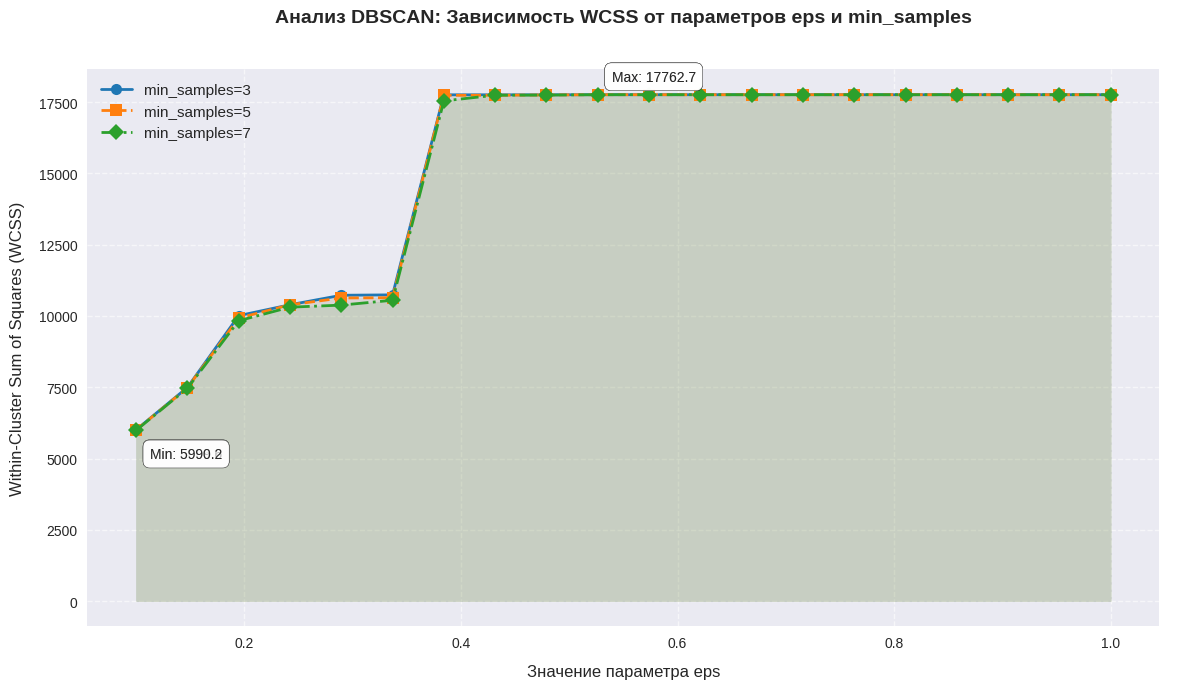

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data_url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/credit_card_clustering.csv'
dataset = pd.read_csv(data_url, index_col=0)

features = dataset.drop(['CustomerID'], axis=1) if 'CustomerID' in dataset.columns else dataset.copy()

features_encoded = pd.get_dummies(features)
scaler = StandardScaler().fit(features_encoded)
scaled_features = scaler.transform(features_encoded)
scaled_features = pd.DataFrame(scaled_features, columns=features_encoded.columns)

two_dimensional_data = scaled_features.iloc[:, :2]

def calculate_within_cluster_sum_of_squares(data, cluster_labels):
    total_wcss = 0
    clusters = set(cluster_labels)
    clusters.discard(-1)

    for cluster_id in clusters:
        cluster_points = data[cluster_labels == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        total_wcss += ((cluster_points - cluster_center) ** 2).sum()

    return total_wcss
epsilon_values = np.linspace(0.1, 1.0, 20)
min_samples_options = [3, 5, 7]

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 7))
colors = plt.cm.tab10.colors
line_styles = ['-', '--', '-.']
markers = ['o', 's', 'D']

for i, min_samples in enumerate(min_samples_options):
    wcss_results = []
    clusters_count = []

    for eps in epsilon_values:
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(two_dimensional_data)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        clusters_count.append(n_clusters)

        wcss = calculate_within_cluster_sum_of_squares(two_dimensional_data.values, labels) if n_clusters > 0 else np.nan
        wcss_results.append(wcss)

    line, = plt.plot(epsilon_values, wcss_results,
                    linestyle=line_styles[i],
                    marker=markers[i],
                    color=colors[i],
                    markersize=8,
                    linewidth=2,
                    label=f'min_samples={min_samples}')

    plt.fill_between(epsilon_values, wcss_results, alpha=0.1, color=colors[i])

    max_idx = np.nanargmax(wcss_results)
    min_idx = np.nanargmin(wcss_results)
    plt.annotate(f'Max: {wcss_results[max_idx]:.1f}',
                 xy=(epsilon_values[max_idx], wcss_results[max_idx]),
                 xytext=(10, 10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))
    plt.annotate(f'Min: {wcss_results[min_idx]:.1f}',
                 xy=(epsilon_values[min_idx], wcss_results[min_idx]),
                 xytext=(10, -20), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

plt.title('Анализ DBSCAN: Зависимость WCSS от параметров eps и min_samples\n',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Значение параметра eps', fontsize=12, labelpad=10)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12, labelpad=10)
plt.legend(fontsize=11, framealpha=1, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)

ax2 = plt.gca().twinx()
ax2.set_ylabel('Количество кластеров (не показано)', fontsize=12, alpha=0)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

#Понижение размерности

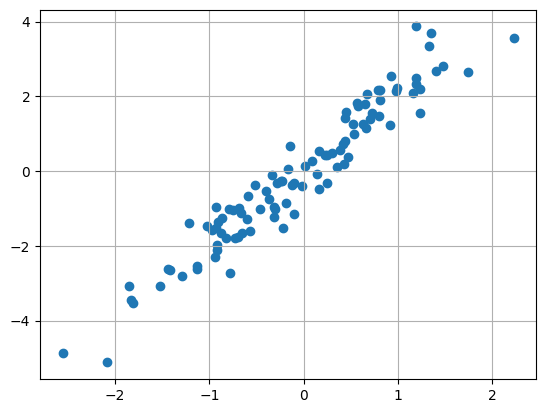

In [ ]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)
X = np.column_stack((x, y))

plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

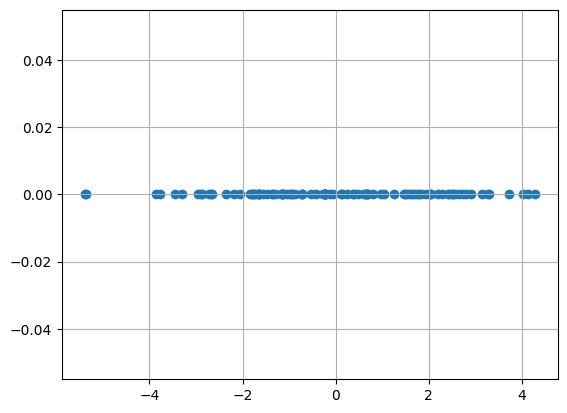

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]))
plt.grid(True)
plt.show()

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.42900579 0.90330174]]
Объясненная дисперсия: [0.98862515]


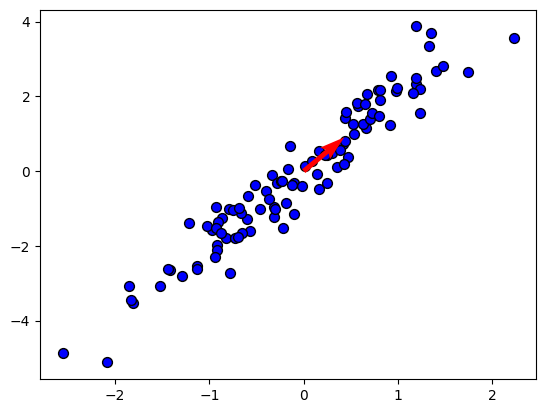

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

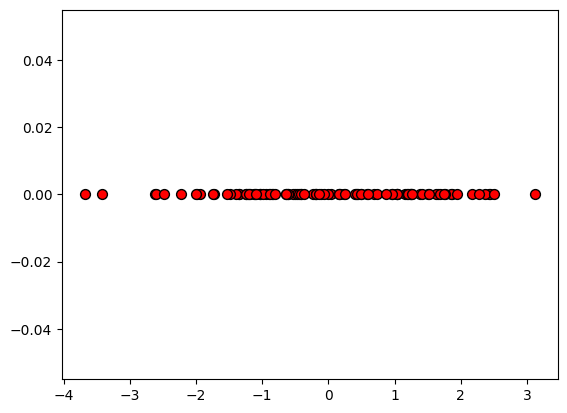

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

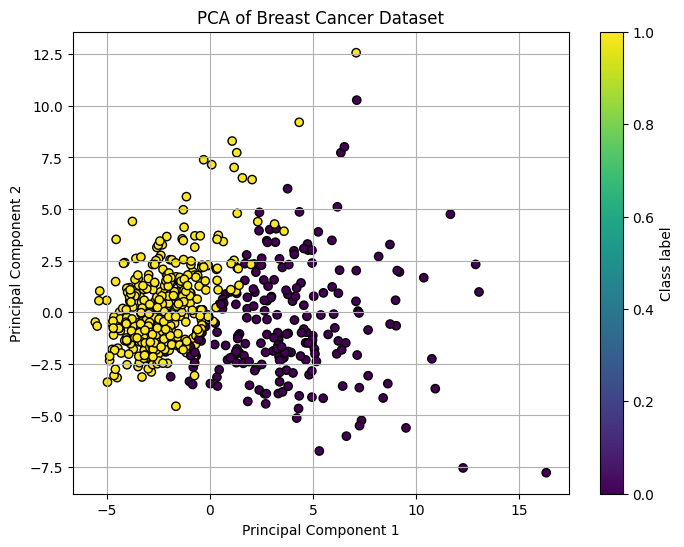

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Class label')
plt.grid(True)
plt.show()

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


In [ ]:
n_components_range = range(1, 31)
explained_variance = []
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

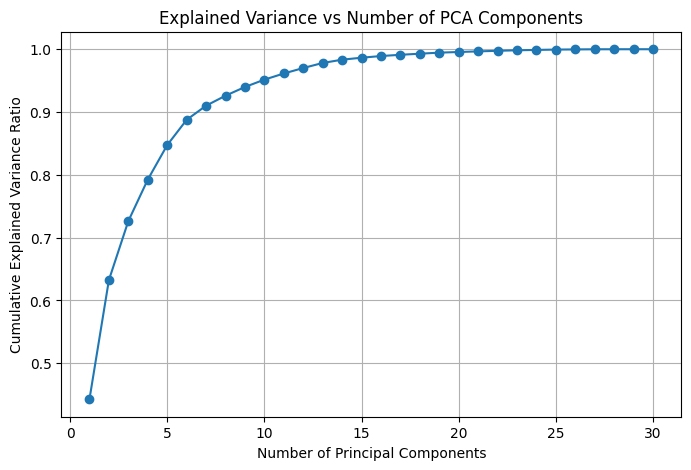

In [ ]:
import matplotlib.pyplot as plt

n_components_range = range(1, 31)
explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


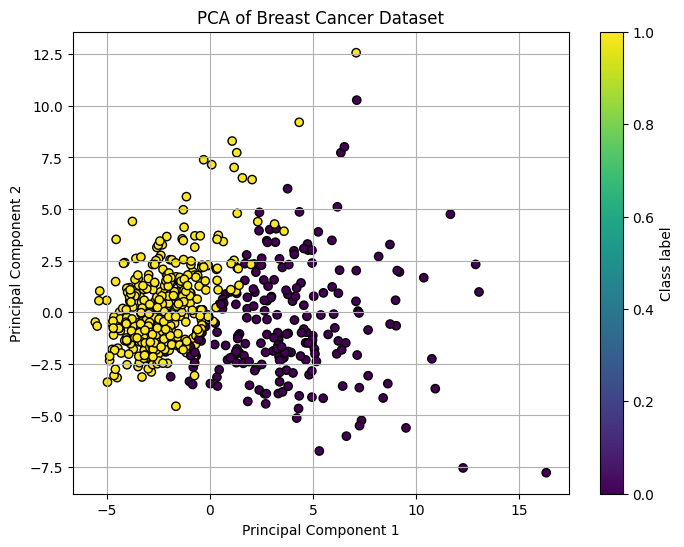

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Class label')
plt.grid(True)
plt.show()

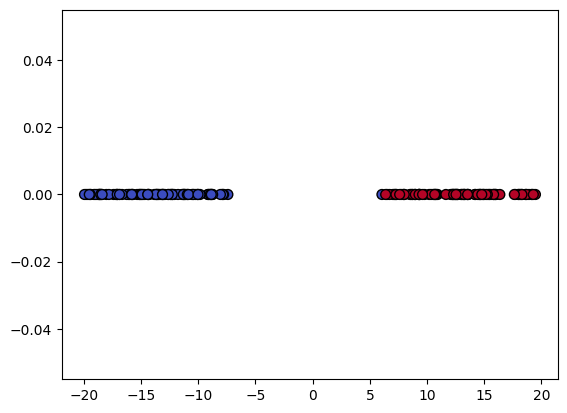

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], np.zeros_like(X_tsne[:, 0]), c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.show()

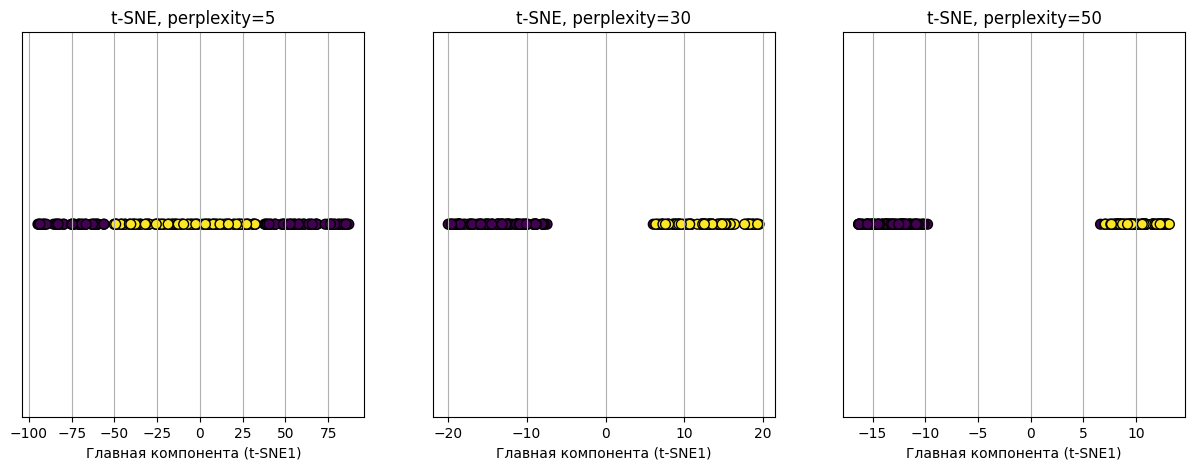

In [ ]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

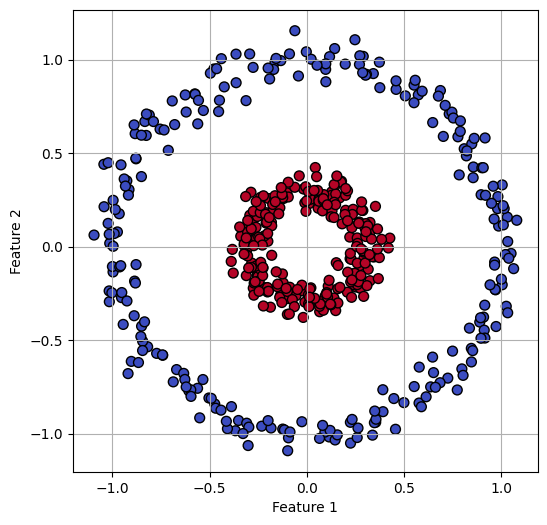

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

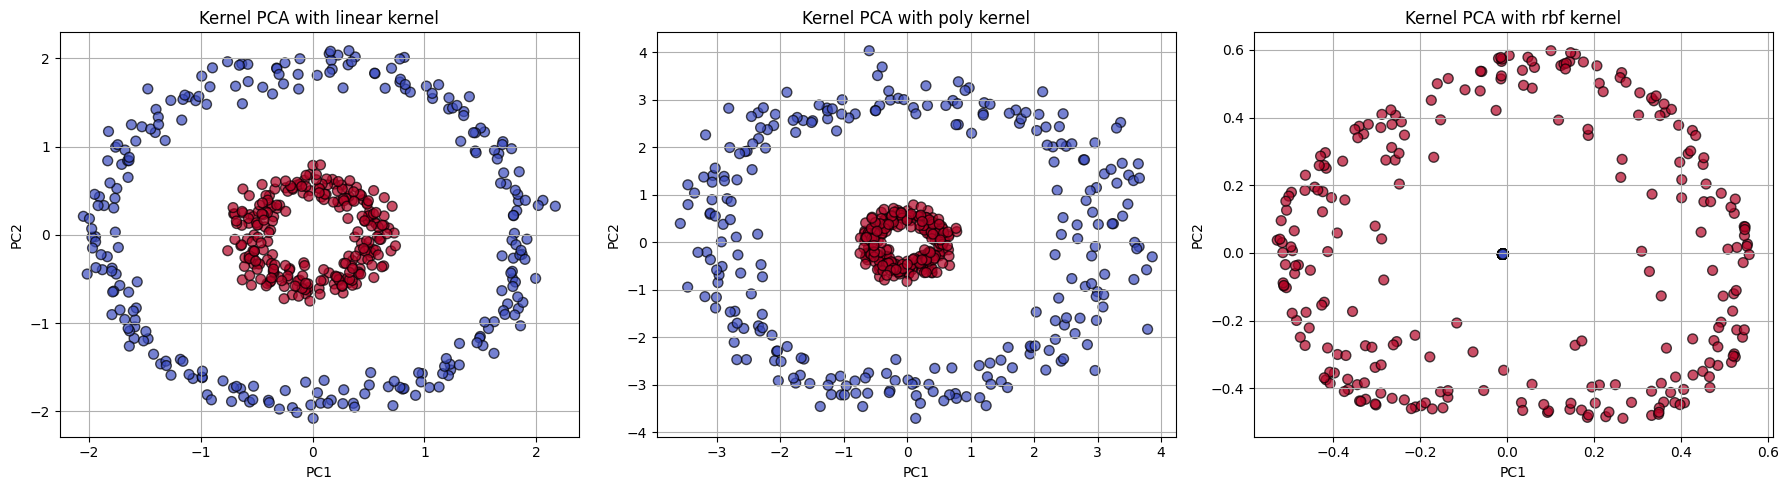

In [ ]:
from sklearn.decomposition import KernelPCA
kernels = ['linear', 'poly', 'rbf']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(18, 5))
for i, kernel in enumerate(kernels, 1):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)
    plt.subplot(1, 3, i)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
    plt.title(f'Kernel PCA with {kernel} kernel')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
plt.tight_layout()
plt.show()

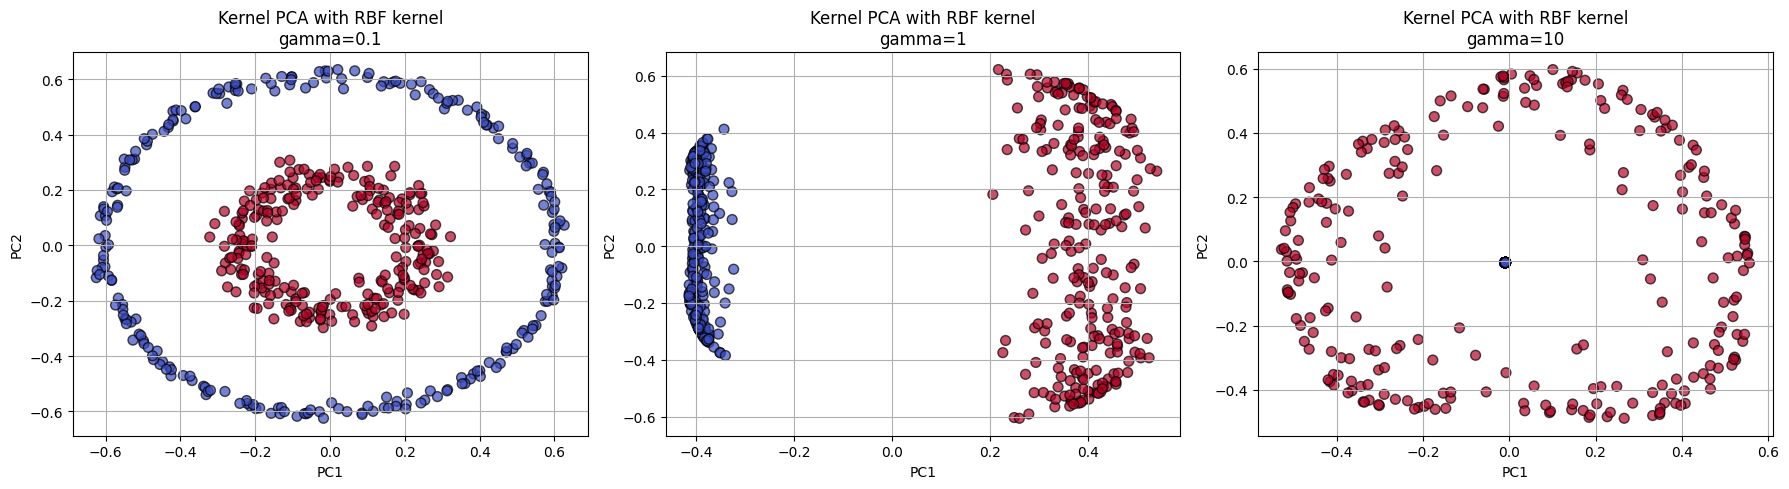

In [ ]:
gamma_values = [0.1, 1, 10]

plt.figure(figsize=(18, 5))
for i, gamma in enumerate(gamma_values, 1):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
    plt.title(f'Kernel PCA with RBF kernel\ngamma={gamma}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)

plt.tight_layout()
plt.show()